<a href="https://colab.research.google.com/github/biellefernanded/resultados-Meli/blob/main/Meli_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# DESAFIO (1): A base de dados contém informações sobre os resultados de ofertas do tipo relâmpago para um período de tempo e um país específico.
# São ofertas que têm duração definida de algumas horas e um percentual de unidades (estoque) comprometidas.

# O objetivo do desafio: fazer uma EDA sobre estes dados procurando insights sobre este tipo de ofertas.


In [ ]:
#1.Imports das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path

In [14]:
#2.Carregamento da base de dados

# Carregar a base
df = pd.read_csv("ofertas_relampago.csv")

# Visão rápida
print("Formato:", df.shape)
print(df.head())


Formato: (48746, 13)
  OFFER_START_DATE           OFFER_START_DTTM          OFFER_FINISH_DTTM  \
0       2021-06-22  2021-06-22 16:00:00+00:00  2021-06-22 23:02:43+00:00   
1       2021-06-22  2021-06-22 13:00:00+00:00  2021-06-22 19:00:02+00:00   
2       2021-06-22  2021-06-22 07:00:00+00:00  2021-06-22 13:00:01+00:00   
3       2021-06-22  2021-06-22 19:00:00+00:00  2021-06-23 01:36:12+00:00   
4       2021-06-22  2021-06-22 13:00:00+00:00  2021-06-22 15:48:12+00:00   

       OFFER_TYPE  INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  SOLD_AMOUNT  \
0  lightning_deal               4                         -2         4.72   
1  lightning_deal               5                          5          NaN   
2  lightning_deal              15                         12        10.73   
3  lightning_deal              15                         13         7.03   
4  lightning_deal              15                          0        39.65   

   SOLD_QUANTITY ORIGIN SHIPPING_PAYMENT_TYPE DOM_DOMAIN_AG

In [12]:
# Estrutura dos Dados
# Período: datas de início entre 22/06/2021 e 30/07/2021 (61 dias distintos).
# Ofertas: todas do tipo lightning_deal (ofertas relâmpago).
# Colunas principais:
# INVOLVED_STOCK: estoque inicial envolvido (1 até 9.000).
# REMAINING_STOCK_AFTER_END: estoque remanescente (pode ser negativo em alguns casos).
# SOLD_AMOUNT: valor vendido (disponível em ~25k ofertas, metade dos registros).
# SOLD_QUANTITY: quantidade vendida (também ~25k ofertas).
# DOM_DOMAIN_AGG1: categoria agregada (36 grupos).
# VERTICAL: vertical de negócio (9 categorias).
# DOMAIN_ID: identificador do produto.
# SHIPPING_PAYMENT_TYPE: "free_shipping" ou "none".


In [15]:
#3. Informacoes gerais e estatisticas

# Verificando os tipos das variaveis, valores faltantes e contagem
df.info()

# Estatísticas descritivas (numéricas e categóricas)
df.describe(include="all", percentiles=[.25,.5,.75]).T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OFFER_START_DATE,48746,61,2021-07-30,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFFER_START_DTTM,48746,783,2021-07-30 13:00:00+00:00,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFFER_FINISH_DTTM,48746,7578,2021-07-06 13:00:01+00:00,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFFER_TYPE,48746,1,lightning_deal,48746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INVOLVED_STOCK,48746.0,NaN,NaN,NaN,35.007508,206.761058,1.0,5.0,10.0,15.0,9000.0
REMAINING_STOCK_AFTER_END,48746.0,NaN,NaN,NaN,30.565216,195.813806,-192.0,4.0,8.0,15.0,8635.0
SOLD_AMOUNT,24579.0,NaN,NaN,NaN,51.208898,175.254414,0.28,5.73,12.42,30.925,4836.57
SOLD_QUANTITY,24579.0,NaN,NaN,NaN,10.851052,45.475305,1.0,1.0,3.0,6.0,1646.0
ORIGIN,11316,1,A,11316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHIPPING_PAYMENT_TYPE,48746,2,free_shipping,26658,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#4. Limpeza e engenharia das variaveis

# Conversão de datas/horas
for col in ["OFFER_START_DTTM", "OFFER_FINISH_DTTM"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")

df["OFFER_START_DATE"] = pd.to_datetime(df["OFFER_START_DATE"], errors="coerce").dt.date
df["START_DATE"] = pd.to_datetime(df["OFFER_START_DATE"], errors="coerce")
df["START_HOUR"] = df["OFFER_START_DTTM"].dt.hour

# Duração em horas
df["DURATION_H"] = (df["OFFER_FINISH_DTTM"] - df["OFFER_START_DTTM"]).dt.total_seconds() / 3600

# Normalização de strings para evitar discrepancias por maiuscula e minuscula
if "SHIPPING_PAYMENT_TYPE" in df.columns:
    df["SHIPPING_PAYMENT_TYPE"] = df["SHIPPING_PAYMENT_TYPE"].astype(str).str.lower().str.strip()
if "OFFER_TYPE" in df.columns:
    df["OFFER_TYPE"] = df["OFFER_TYPE"].astype(str).str.lower().str.strip()

# Quantidade vendida observada e estimada (estoque inicial - remanescente)
sold_qty_obs = df["SOLD_QUANTITY"] if "SOLD_QUANTITY" in df.columns else pd.Series(index=df.index, dtype="float")
sold_qty_est = (df["INVOLVED_STOCK"] - df["REMAINING_STOCK_AFTER_END"]).where(
    (df["INVOLVED_STOCK"].notna()) & (df["REMAINING_STOCK_AFTER_END"].notna())
)

# Sanidade: remover valores impossíveis
sold_qty_est = sold_qty_est.where(sold_qty_est >= 0)
sold_qty_est = sold_qty_est.where(sold_qty_est <= df["INVOLVED_STOCK"])

# Melhor proxy de quantidade vendida
df["BEST_SOLD_QTY"] = sold_qty_obs.fillna(sold_qty_est)
df["BEST_SOLD_QTY"] = df["BEST_SOLD_QTY"].clip(lower=0, upper=df["INVOLVED_STOCK"])

# Taxa de esgotamento = uma metrica de sucesso de ofertas
df["SELL_THROUGH_RATE"] = (df["BEST_SOLD_QTY"] / df["INVOLVED_STOCK"]).replace([np.inf, -np.inf], np.nan)

# Receita e receita por unidade = ticket medio por unidade
df["SOLD_AMOUNT"] = pd.to_numeric(df.get("SOLD_AMOUNT", np.nan), errors="coerce")
df["REV_PER_UNIT"] = (df["SOLD_AMOUNT"] / df["BEST_SOLD_QTY"]).replace([np.inf, -np.inf], np.nan)

df[["INVOLVED_STOCK","REMAINING_STOCK_AFTER_END","SOLD_AMOUNT","SOLD_QUANTITY","BEST_SOLD_QTY","SELL_THROUGH_RATE","REV_PER_UNIT","DURATION_H"]].head(10)


,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,BEST_SOLD_QTY,SELL_THROUGH_RATE,REV_PER_UNIT,DURATION_H
0,4,-2,4.72,6.0,4.0,1.000000,1.180000,7.045278
1,5,5,NaN,NaN,0.0,0.000000,NaN,6.000556
2,15,12,10.73,3.0,3.0,0.200000,3.576667,6.000278
3,15,13,7.03,2.0,2.0,0.133333,3.515000,6.603333
4,15,0,39.65,15.0,15.0,1.000000,2.643333,2.803333
5,23,23,NaN,NaN,0.0,0.000000,NaN,7.003333
6,10,10,NaN,NaN,0.0,0.000000,NaN,6.000000
7,10,-1,103.03,11.0,10.0,1.000000,10.303000,4.094167
8,10,-1,NaN,NaN,NaN,NaN,NaN,4.092222
9,15,13,10.65,2.0,2.0,0.133333,5.325000,6.000000


In [17]:
#5. Visao geral

def missing_pct(s):
    return s.isna().mean() * 100

overview = pd.DataFrame({
    "rows": [len(df)],
    "period_min_start": [df["OFFER_START_DTTM"].min()],
    "period_max_start": [df["OFFER_START_DTTM"].max()],
    "unique_days": [df["OFFER_START_DATE"].nunique()],
    "unique_domains": [df["DOMAIN_ID"].nunique() if "DOMAIN_ID" in df.columns else np.nan],
    "unique_verticals": [df["VERTICAL"].nunique() if "VERTICAL" in df.columns else np.nan],
    "unique_categories": [df["DOM_DOMAIN_AGG1"].nunique() if "DOM_DOMAIN_AGG1" in df.columns else np.nan],
})
overview



,rows,period_min_start,period_max_start,unique_days,unique_domains,unique_verticals,unique_categories
0,48746,2021-06-01 07:00:00+00:00,2021-07-31 19:00:00+00:00,61,1266,9,36


In [18]:
# Estatisticas para metricas principais
num_summary = df[["INVOLVED_STOCK","REMAINING_STOCK_AFTER_END","BEST_SOLD_QTY","SOLD_AMOUNT","SELL_THROUGH_RATE","REV_PER_UNIT","DURATION_H"]]    .describe(percentiles=[.25,.5,.75,.9,.95,.99]).T
num_summary.round(3)


,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
INVOLVED_STOCK,48746.0,35.008,206.761,1.000,5.00,10.000,15.000,30.000,100.000,554.950,9000.000
REMAINING_STOCK_AFTER_END,48746.0,30.565,195.814,-192.000,4.00,8.000,15.000,24.000,79.000,491.550,8635.000
BEST_SOLD_QTY,48714.0,5.311,31.282,0.000,0.00,1.000,3.000,7.000,15.000,104.000,1646.000
SOLD_AMOUNT,24579.0,51.209,175.254,0.280,5.73,12.420,30.925,86.990,197.513,788.193,4836.570
SELL_THROUGH_RATE,48714.0,0.202,0.308,0.000,0.00,0.025,0.267,0.800,1.000,1.000,1.000
REV_PER_UNIT,24579.0,8.890,22.371,0.124,2.40,4.048,7.708,15.325,25.563,108.416,639.070
DURATION_H,48746.0,5.708,2.113,0.000,6.00,6.001,6.004,8.000,8.000,8.015,104.752


In [19]:
# Verificando os missings
missing_table = df.assign(**{c: df[c].isna() for c in df.columns})[df.columns].isna().mean().sort_values(ascending=False)    .to_frame("missing_pct").apply(lambda x: x*100)
missing_table.round(2).head(20)


,missing_pct
OFFER_START_DATE,0.0
OFFER_START_DTTM,0.0
OFFER_FINISH_DTTM,0.0
OFFER_TYPE,0.0
INVOLVED_STOCK,0.0
REMAINING_STOCK_AFTER_END,0.0
SOLD_AMOUNT,0.0
SOLD_QUANTITY,0.0
ORIGIN,0.0
SHIPPING_PAYMENT_TYPE,0.0


In [20]:
#6. Impacto do frete gratis (comparando ofertas com frete gratis vs sem frete gratis)

ship_agg = df.groupby("SHIPPING_PAYMENT_TYPE").agg(
    offers=("SHIPPING_PAYMENT_TYPE","size"),
    avg_stock=("INVOLVED_STOCK","mean"),
    med_stock=("INVOLVED_STOCK","median"),
    avg_sold_qty=("BEST_SOLD_QTY","mean"),
    med_sold_qty=("BEST_SOLD_QTY","median"),
    avg_sell_through=("SELL_THROUGH_RATE","mean"),
    med_sell_through=("SELL_THROUGH_RATE","median"),
    total_revenue=("SOLD_AMOUNT","sum"),
).sort_values("offers", ascending=False)
ship_agg.round(3)


,offers,avg_stock,med_stock,avg_sold_qty,med_sold_qty,avg_sell_through,med_sell_through,total_revenue
SHIPPING_PAYMENT_TYPE,,,,,,,,
free_shipping,26658,22.227,10.0,2.414,0.0,0.156,0.000,748536.12
none,22088,50.432,15.0,8.810,1.0,0.257,0.067,510127.38


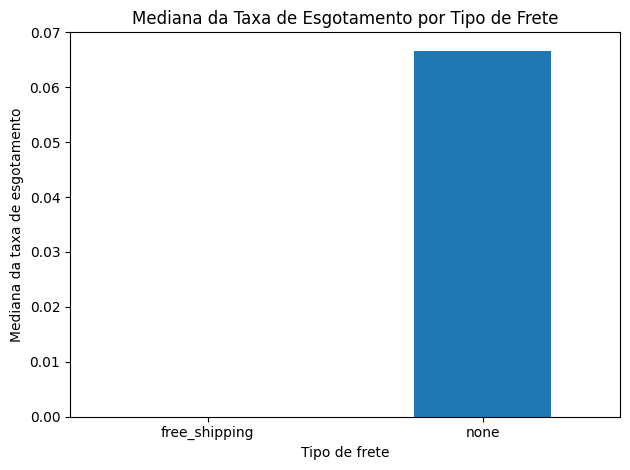

In [21]:
# Gráfico: Mediana da taxa de esgotamento por tipo de frete
ship_agg["med_sell_through"].plot(kind="bar")
plt.title("Mediana da Taxa de Esgotamento por Tipo de Frete")
plt.xlabel("Tipo de frete")
plt.ylabel("Mediana da taxa de esgotamento")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
#7. Desempenho por vertical
# (Mostra onde as ofertas tem mais volume e qual a mediana de tx de esgotamento)
# Ajudando a priorizar verticais/categoria para futuras ofertas

vertical_agg = df.groupby("VERTICAL").agg(
    offers=("VERTICAL","size"),
    avg_sell_through=("SELL_THROUGH_RATE","mean"),
    med_sell_through=("SELL_THROUGH_RATE","median"),
    total_revenue=("SOLD_AMOUNT","sum"),
    med_rev_per_unit=("REV_PER_UNIT","median"),
).sort_values("offers", ascending=False)
vertical_top = vertical_agg.head(12)
vertical_top.round(3)


,offers,avg_sell_through,med_sell_through,total_revenue,med_rev_per_unit
VERTICAL,,,,,
APP & SPORTS,13241,0.186,0.008,131101.36,4.275
HOME & INDUSTRY,11011,0.194,0.000,155518.68,4.250
CE,8629,0.216,0.067,362787.94,5.364
BEAUTY & HEALTH,7150,0.268,0.100,547427.27,3.145
CPG,2714,0.190,0.000,16787.68,2.860
T & B,2624,0.100,0.000,14302.78,4.890
ACC,2573,0.225,0.067,26819.98,3.690
ENTERTAINMENT,525,0.128,0.000,1988.57,4.133
OTHERS,279,0.147,0.000,1929.24,4.222


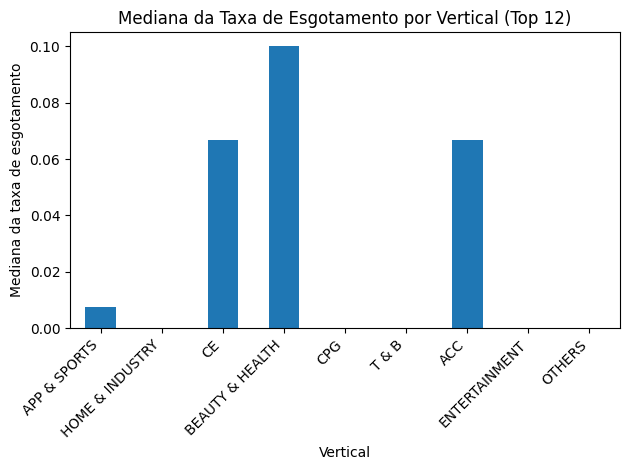

In [23]:
vertical_top["med_sell_through"].plot(kind="bar")
plt.title("Mediana da Taxa de Esgotamento por Vertical (Top 12)")
plt.xlabel("Vertical")
plt.ylabel("Mediana da taxa de esgotamento")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [24]:
#8. Desempenho por categoria

cat_agg = df.groupby("DOM_DOMAIN_AGG1").agg(
    offers=("DOM_DOMAIN_AGG1","size"),
    avg_sell_through=("SELL_THROUGH_RATE","mean"),
    med_sell_through=("SELL_THROUGH_RATE","median"),
    total_revenue=("SOLD_AMOUNT","sum"),
    med_rev_per_unit=("REV_PER_UNIT","median"),
).sort_values("offers", ascending=False)
cat_top = cat_agg.head(12)
cat_top.round(3)

,offers,avg_sell_through,med_sell_through,total_revenue,med_rev_per_unit
DOM_DOMAIN_AGG1,,,,,
HOME&DECOR,6742,0.203,0.010,87761.65,3.835
APPAREL ACCESORIES,4387,0.178,0.000,36565.63,3.472
APPAREL,3856,0.174,0.025,36569.90,4.994
COMPUTERS,3770,0.259,0.075,83941.78,3.380
SPORTS,3289,0.216,0.050,33118.70,3.251
PHARMACEUTICS,3035,0.336,0.199,440216.74,3.079
ELECTRONICS,3018,0.164,0.010,119853.95,8.323
PERSONAL CARE,3016,0.207,0.040,18380.28,2.573
MOBILE,1841,0.214,0.067,158992.21,5.715


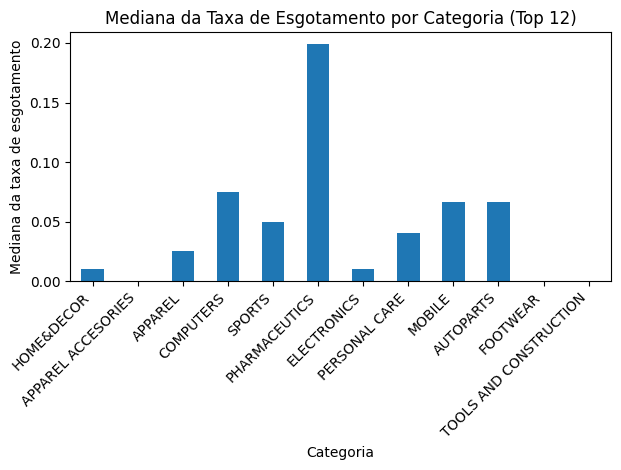

In [25]:
cat_top["med_sell_through"].plot(kind="bar")
plt.title("Mediana da Taxa de Esgotamento por Categoria (Top 12)")
plt.xlabel("Categoria")
plt.ylabel("Mediana da taxa de esgotamento")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [26]:
#9. Taxa de Esgotamento (Buckets de Sucesso)
# Entendendo a concentracao de performance das ofertas
# ou seja, muitas ofertas vendendo pouco ou varias altas

bins = [0, .2, .5, .8, 1.0, np.inf]
labels = ["0–20%", "20–50%", "50–80%", "80–100%", "100%+"]
df["SELL_BUCKET"] = pd.cut(df["SELL_THROUGH_RATE"], bins=bins, labels=labels, include_lowest=True)

bucket_counts = df["SELL_BUCKET"].value_counts(dropna=False).sort_index()
bucket_rates = (bucket_counts / bucket_counts.sum()) * 100
bucket_table = pd.DataFrame({"offers": bucket_counts, "share_pct": bucket_rates})
bucket_table.round(2)

,offers,share_pct
SELL_BUCKET,,
0–20%,36074,74.00
20–50%,5197,10.66
50–80%,3182,6.53
80–100%,4261,8.74
100%+,0,0.00
NaN,32,0.07


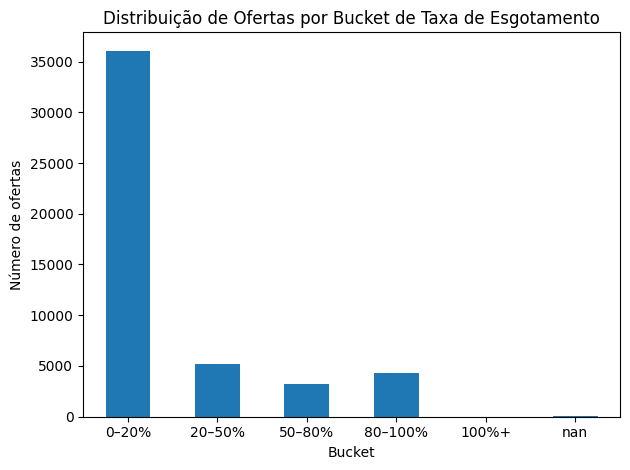

In [27]:
bucket_counts.plot(kind="bar")
plt.title("Distribuição de Ofertas por Bucket de Taxa de Esgotamento")
plt.xlabel("Bucket")
plt.ylabel("Número de ofertas")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

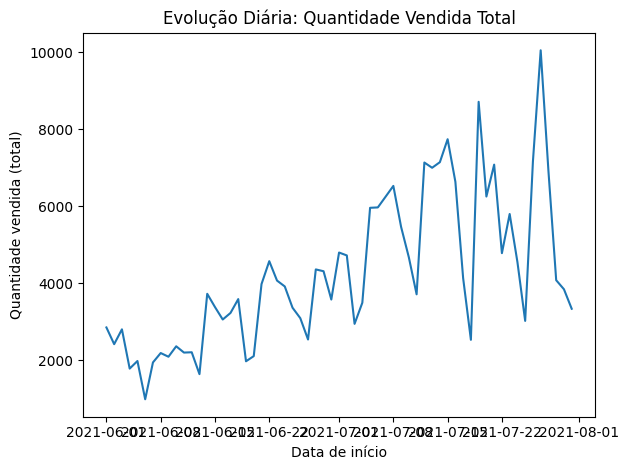

In [28]:
#10. Sazonalidade por dia e hora

# Evolucao de quantidade vendida total por dia
by_day = df.groupby("OFFER_START_DATE").agg(
    offers=("OFFER_START_DATE","size"),
    avg_sell_through=("SELL_THROUGH_RATE","mean"),
    total_revenue=("SOLD_AMOUNT","sum"),
    total_qty=("BEST_SOLD_QTY","sum"),
).reset_index().sort_values("OFFER_START_DATE")



plt.plot(by_day["OFFER_START_DATE"], by_day["total_qty"])
plt.title("Evolução Diária: Quantidade Vendida Total")
plt.xlabel("Data de início")
plt.ylabel("Quantidade vendida (total)")
plt.tight_layout()
plt.show()


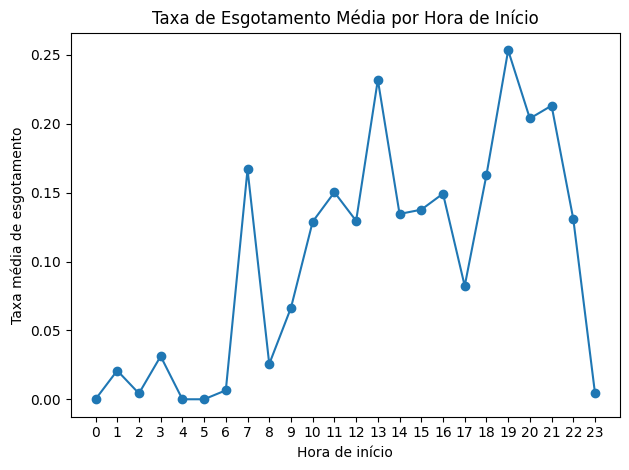

In [29]:
# Taxa media de esgotamento por hora do dia
by_hour = df.dropna(subset=["START_HOUR"]).groupby("START_HOUR").agg(
    offers=("START_HOUR","size"),
    avg_sell_through=("SELL_THROUGH_RATE","mean"),
    total_revenue=("SOLD_AMOUNT","sum"),
    total_qty=("BEST_SOLD_QTY","sum"),
).reset_index().sort_values("START_HOUR")

by_day.head(), by_hour.head()


plt.plot(by_hour["START_HOUR"], by_hour["avg_sell_through"], marker="o")
plt.title("Taxa de Esgotamento Média por Hora de Início")
plt.xlabel("Hora de início")
plt.ylabel("Taxa média de esgotamento")
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

In [30]:
#11. Ofertas Destaque

# Verificando casos de sucesso extremo e se ha estoque zerado ou negativo
top_revenue = df.sort_values("SOLD_AMOUNT", ascending=False).head(15)[
    ["OFFER_START_DTTM","DOMAIN_ID","VERTICAL","DOM_DOMAIN_AGG1","SHIPPING_PAYMENT_TYPE",
     "INVOLVED_STOCK","BEST_SOLD_QTY","SOLD_AMOUNT","REV_PER_UNIT","SELL_THROUGH_RATE"]
]
top_revenue

,OFFER_START_DTTM,DOMAIN_ID,VERTICAL,DOM_DOMAIN_AGG1,SHIPPING_PAYMENT_TYPE,INVOLVED_STOCK,BEST_SOLD_QTY,SOLD_AMOUNT,REV_PER_UNIT,SELL_THROUGH_RATE
11449,2021-07-27 09:00:00+00:00,MLM-DISPOSABLE_GLOVES,BEAUTY & HEALTH,BEAUTY EQUIPMENT,none,2000,1503.0,4836.57,3.217944,0.751500
37095,2021-06-18 15:00:00+00:00,MLM-CELLPHONES,CE,MOBILE,free_shipping,100,75.0,4678.68,62.382400,0.750000
13737,2021-07-19 13:00:00+00:00,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,BEAUTY & HEALTH,PHARMACEUTICS,none,4000,1646.0,4570.31,2.776616,0.411500
45804,2021-07-26 17:00:00+00:00,MLM-CELLPHONES,CE,MOBILE,free_shipping,2000,67.0,4264.51,63.649403,0.033500
13742,2021-07-19 12:00:00+00:00,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,BEAUTY & HEALTH,PHARMACEUTICS,none,7000,1358.0,3988.84,2.937290,0.194000
28614,2021-07-21 12:00:00+00:00,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,BEAUTY & HEALTH,PHARMACEUTICS,none,4000,1218.0,3530.39,2.898514,0.304500
43923,2021-07-12 13:00:00+00:00,MLM-CELLPHONES,CE,MOBILE,free_shipping,200,110.0,3524.05,32.036818,0.550000
9813,2021-07-20 18:00:00+00:00,MLM-CELLPHONES,CE,MOBILE,free_shipping,200,54.0,3346.39,61.970185,0.270000
612,2021-06-22 15:00:00+00:00,MLM-CELLPHONES,CE,MOBILE,free_shipping,200,52.0,3199.32,61.525385,0.260000
46620,2021-07-16 12:00:00+00:00,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,BEAUTY & HEALTH,PHARMACEUTICS,none,1188,1152.0,3198.34,2.776337,0.969697


In [31]:
top_sellthrough = df.sort_values("SELL_THROUGH_RATE", ascending=False).head(15)[
    ["OFFER_START_DTTM","DOMAIN_ID","VERTICAL","DOM_DOMAIN_AGG1","SHIPPING_PAYMENT_TYPE",
     "INVOLVED_STOCK","BEST_SOLD_QTY","SOLD_AMOUNT","REV_PER_UNIT","SELL_THROUGH_RATE"]
]
top_sellthrough

,OFFER_START_DTTM,DOMAIN_ID,VERTICAL,DOM_DOMAIN_AGG1,SHIPPING_PAYMENT_TYPE,INVOLVED_STOCK,BEST_SOLD_QTY,SOLD_AMOUNT,REV_PER_UNIT,SELL_THROUGH_RATE
48702,2021-06-19 11:00:00+00:00,MLM-MOTORCYCLE_HELMETS,ACC,MOTOPARTS,free_shipping,1,1.0,11.22,11.220000,1.0
24,2021-06-22 16:00:00+00:00,MLM-FISH_FOODS,CPG,PETS FOOD,none,8,8.0,9.20,1.150000,1.0
26,2021-06-22 19:00:00+00:00,MLM-SHOWER_HEADS,HOME & INDUSTRY,TOOLS AND CONSTRUCTION,free_shipping,5,5.0,20.01,4.002000,1.0
48719,2021-06-19 13:00:00+00:00,MLM-LAUNDRY_BAR_SOAPS,CPG,CLEANING,none,30,30.0,9.52,0.317333,1.0
48720,2021-06-19 12:00:00+00:00,MLM-BUCKETS_AND_BASINS,CPG,CLEANING,free_shipping,5,5.0,70.14,14.028000,1.0
7,2021-06-22 19:00:00+00:00,MLM-HEADPHONES,CE,COMPUTERS,free_shipping,10,10.0,103.03,10.303000,1.0
25554,2021-07-18 13:00:00+00:00,MLM-SNEAKERS,APP & SPORTS,FOOTWEAR,free_shipping,5,5.0,94.44,18.888000,1.0
12615,2021-07-30 11:00:00+00:00,MLM-PORTABLE_DVD_PLAYERS,CE,ELECTRONICS,free_shipping,5,5.0,67.80,13.560000,1.0
12623,2021-07-30 19:00:00+00:00,MLM-NAIL_POLISH,BEAUTY & HEALTH,PERSONAL CARE,none,5,5.0,8.71,1.742000,1.0
48630,2021-06-19 19:00:00+00:00,MLM-BRAS,APP & SPORTS,APPAREL,none,5,5.0,11.56,2.312000,1.0
